bio-grid-yeast

In [1]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from scipy import stats
import random

In [2]:
bio_graph = nx.read_edgelist('C:\\Users\\ElifB\\Desktop\\bio-yeast.txt', comments='#', nodetype = int)
num_nodes = len(nx.nodes(bio_graph))
num_edges = len(nx.edges(bio_graph))
print("Number of nodes: ", num_nodes, "\nNumber of edges: ", num_edges)

Number of nodes:  1458 
Number of edges:  1948


In [3]:
nx.degree(bio_graph)

DegreeView({24: 6, 1: 5, 595: 20, 1143: 2, 1392: 5, 1405: 2, 156: 3, 2: 3, 951: 3, 1033: 2, 459: 3, 3: 2, 997: 5, 4: 1, 27: 25, 5: 2, 778: 7, 367: 19, 6: 1, 284: 2, 7: 3, 444: 5, 1141: 2, 807: 4, 8: 3, 819: 38, 1128: 2, 422: 3, 9: 3, 465: 9, 688: 3, 216: 2, 10: 1, 72: 18, 11: 9, 154: 12, 291: 1, 601: 5, 626: 3, 728: 2, 933: 1, 1203: 2, 1216: 2, 81: 12, 12: 11, 247: 6, 469: 2, 777: 7, 1074: 6, 1180: 3, 1197: 1, 1198: 1, 1199: 1, 1200: 2, 98: 30, 13: 5, 433: 15, 567: 29, 738: 1, 1273: 7, 329: 1, 14: 2, 942: 10, 1105: 2, 15: 1, 345: 15, 16: 1, 17: 5, 844: 29, 1240: 21, 1368: 9, 85: 9, 18: 2, 114: 1, 192: 5, 19: 1, 375: 3, 20: 7, 623: 3, 1067: 10, 1195: 3, 1361: 1, 1362: 1, 706: 2, 21: 1, 165: 4, 22: 6, 202: 7, 288: 5, 426: 4, 810: 5, 1115: 5, 585: 6, 23: 1, 152: 3, 690: 5, 913: 2, 1439: 1, 1440: 1, 166: 7, 25: 11, 263: 3, 347: 3, 472: 4, 620: 3, 638: 27, 784: 6, 789: 2, 955: 4, 1029: 7, 1063: 3, 36: 4, 26: 2, 201: 3, 121: 3, 155: 2, 218: 2, 685: 3, 696: 2, 724: 1, 756: 4, 898: 7, 1009: 2,

In [4]:
# Get the degree of each node
degrees = dict(bio_graph.degree())

# Find the max degree value and print
print('Max degree is: ', max(degrees.values()))

Max degree is:  56


In [83]:
# find the nodes with degree 4
nodes_with_degree_20 = [node for node, degree in degrees.items() if degree == 38]
print("Nodes with degree 20:", nodes_with_degree_20)

Nodes with degree 20: [819]


In [5]:
# Calculate the average degree of the graph
avg_degree = sum(dict(bio_graph.degree()).values()) / num_nodes

print("Average degree:", avg_degree)

Average degree: 2.672153635116598


In [6]:
# For small values e_kk' (degree correlation)
# Calculate the degree correlation between the nodes that have 5 and 6 degree value
e_5_6 = (5/num_nodes)*(6/num_nodes)/(avg_degree**2)

# Calculate the expected number of links between the nodes that have 5 and 6 degree value
E_5_6 = avg_degree * num_nodes * e_5_6
print('The degree correlation for the nodes that have small degree values :', E_5_6)

The degree correlation for the nodes that have small degree values : 0.0077002053388090345


In [7]:
# For big values e_kk' (degree correlation)
# Calculate the degree correlation between the nodes that have 56 and 38 degree value
e_56_38 = (56/num_nodes)*(38/num_nodes)/(avg_degree**2)

# Calculate the expected number of links between the nodes that have 56 and 38 degree value
E_56_38 = avg_degree * num_nodes * e_56_38
print('The degree correlation for the nodes that have small degree values :', E_56_38)


The degree correlation for the nodes that have small degree values : 0.5462012320328543


In [8]:
# Calculate the structural cutoff
ks_N = (avg_degree*num_nodes)**(1/2)
print('ks(N), structural cutoff, is: ', ks_N)
print("My network has no structural cutoff. At the same time, my network has no strctural disassortativity.")

ks(N), structural cutoff, is:  62.41794613730894
My network has no structural cutoff. At the same time, my network has no strctural disassortativity.


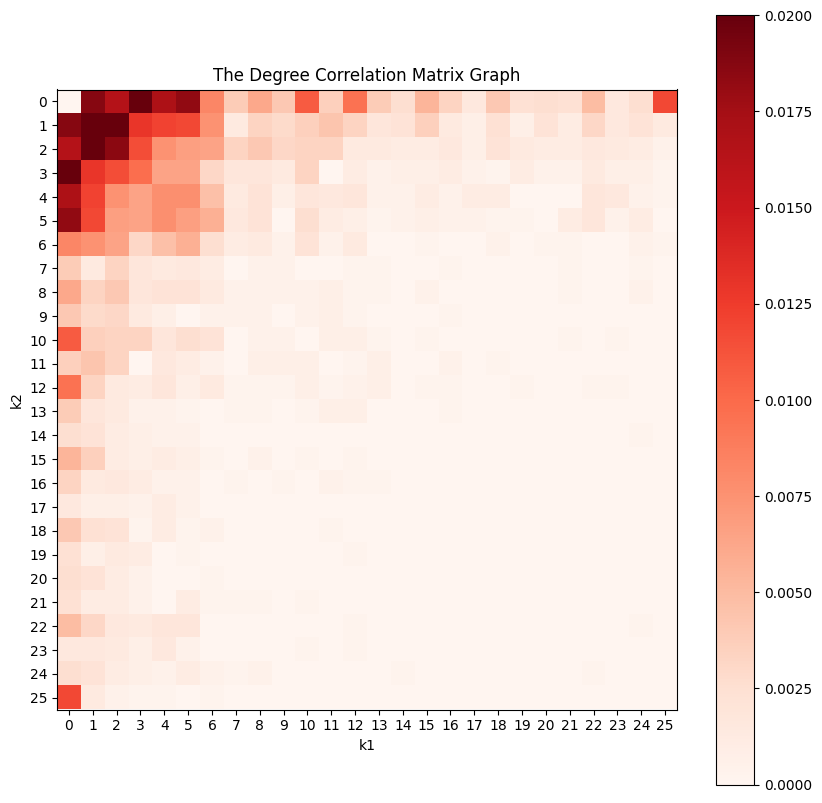

In [9]:
# Compute the degree correlation matrix
D = nx.degree_mixing_matrix(bio_graph)
# Plot the degree correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(D, cmap='Reds')
ax.set_xticks(range(len(D)))
ax.set_yticks(range(len(D)))
ax.set_xticklabels(range(len(D)))
ax.set_yticklabels(range(len(D)))
plt.xlabel('k1')
plt.ylabel('k2')
plt.title('The Degree Correlation Matrix Graph')
plt.colorbar(im)
plt.show()

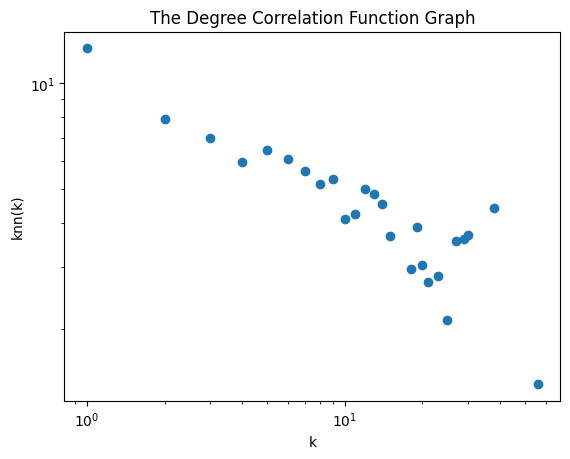

In [10]:
# calculate the average degree connectivity for the graph
knn = nx.average_degree_connectivity(bio_graph)

# extract the values of k and knn(k) for each degree k
k_values = list(knn.keys())
knn_values = list(knn.values())

# create a scatter plot of knn(k) versus k
plt.scatter(k_values, knn_values)
plt.xlabel('k')
plt.ylabel('knn(k)')
plt.title('The Degree Correlation Function Graph')
plt.xscale('log')
plt.yscale('log')
plt.show()

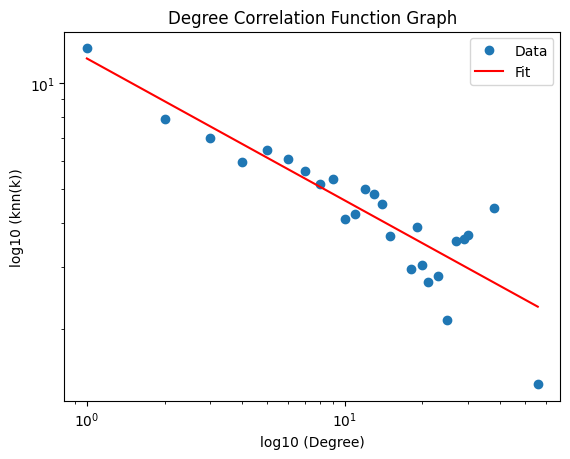

The correlation exponent is:  -0.4035425567003353


In [11]:
from scipy.optimize import curve_fit
# define the power-law function to fit
def power_law(k, a, u):
    return a * np.power(k, u)

# fit the power-law function to the data
params, cov = curve_fit(power_law, k_values, knn_values)

# extract the fitted parameters
a_fit = params[0]
u_fit = params[1]

# create a log-log plot of knn(k) versus k
plt.loglog(k_values, knn_values, 'o', label='Data')
plt.xlabel('k')
plt.ylabel('knn(k)')

# plot the fitted power-law function
k_fit = np.logspace(np.log10(min(k_values)), np.log10(max(k_values)), 100)
knn_fit = power_law(k_fit, a_fit, u_fit)
plt.loglog(k_fit, knn_fit, 'r-', label='Fit')

# add a legend to the plot
plt.legend()

plt.xlabel('log10 (Degree)')
plt.ylabel('log10 (knn(k))')
plt.title('Degree Correlation Function Graph')
plt.show()

print("The correlation exponent is: ", u_fit)

In [12]:
# calculate the degree correlation coefficient for the graph
degree_corr_coeff = nx.degree_pearson_correlation_coefficient(bio_graph)

# print the degree correlation coefficient
print("Degree correlation coefficient (r) is :", degree_corr_coeff)

Degree correlation coefficient (r) is : -0.20954054116464665


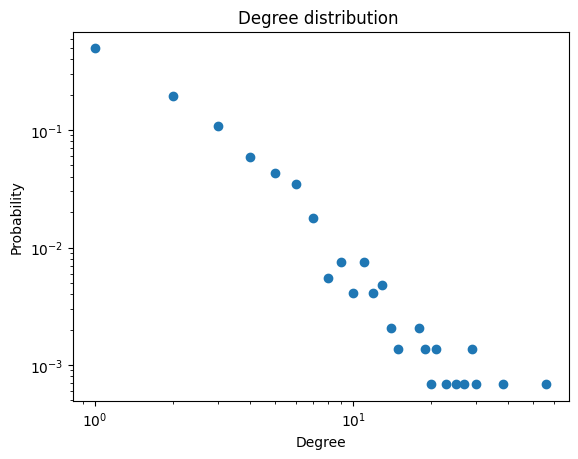

In [13]:
# Get the degree distribution of the graph
degree_sequence = sorted([d for n, d in bio_graph.degree()], reverse=True)
degree_count = nx.degree_histogram(bio_graph)

# Calculate the probability distribution function
p_k = [float(i)/sum(degree_count) for i in degree_count]

# Plot the degree distribution and the probability distribution function
plt.loglog(range(len(degree_count)), p_k, 'o')
plt.title("Degree distribution ")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.show()

In [14]:
# Remove zero values from the degree count list
degree_count = [count for count in degree_count if count != 0]

# Calculate the probability distribution function
p_k = [float(i)/sum(degree_count) for i in degree_count]

# Calculate the logarithmic values
logx = np.log10(range(1, len(degree_count)+1))
logy = np.log10(p_k)

# Fit a linear regression model to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(logx, logy)

# Print the slope and intercept of the line
print("Slope:", slope)
print("Intercept:", intercept)

Slope: -2.2935749825823666
Intercept: 0.025866568189338857


In [16]:
kmin = min(degree_sequence)
print('kmin is: ', kmin)
kmax = max(degree_sequence)
print('kmax is: ', kmax)

kmin is:  1
kmax is:  56


In [17]:
gama = -slope
A = (gama-2)/(3-gama)
B = (A*(kmax**(3-gama)))
fc = 1 - (1/(B-1))
print("By using the degree exponent (ɣ), minimal and maximal degrees we find that the critical threshold is: ", fc)

By using the degree exponent (ɣ), minimal and maximal degrees we find that the critical threshold is:  0.8370980126916602


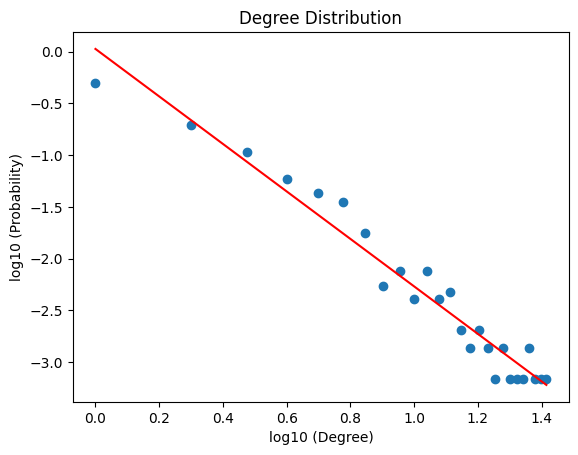

Gama değeri  -2.2935749825823666  olarak bulunmuştur.


In [18]:
x = logx
y = logy

def line_func(x):
    return slope * x + intercept

# Create a plot of the data points and the line
plt.scatter(x, y)
plt.plot(x, line_func(x), color='red')
plt.xlabel('log10 (Degree)')
plt.ylabel('log10 (Probability)')
plt.title('Degree Distribution')
plt.show()

print("Gama değeri ", slope, " olarak bulunmuştur.")